In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR 

In [2]:
def load_data(filename):
    file = open(filename)
    file = csv.reader(file)
    fields = next(file)
    train = np.array([row for row in file], dtype=float).T
    return train[:7,:276],train[7:,:276],train[:7,276:],train[7:,276:],fields 

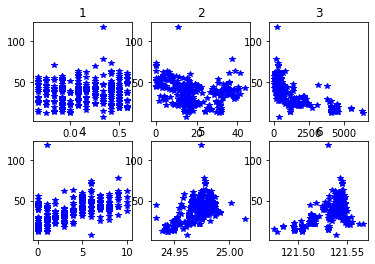

In [3]:
#lading data
X_train,Y_train,X_dev,Y_dev ,fields= load_data("datasets_88705_204267_Real estate.csv")
#data visualisation : dependence of the price on the given factors
fig,ax = plt.subplots(2,3)
ax[0][0].plot(X_train[1,:],Y_train[0,:],'b*')
ax[0][1].plot(X_train[2,:],Y_train[0,:],'b*')
ax[0][2].plot(X_train[3,:],Y_train[0,:],'b*')
ax[1][0].plot(X_train[4,:],Y_train[0,:],'b*')
ax[1][1].plot(X_train[5,:],Y_train[0,:],'b*')
ax[1][2].plot(X_train[6,:],Y_train[0,:],'b*')
for i in range(3):
    ax[0][i].set_title(i+1)  #the title of the plot denotes index no. of the feature
for i in range(3):
    ax[1][i].set_title(4+i)
plt.show()

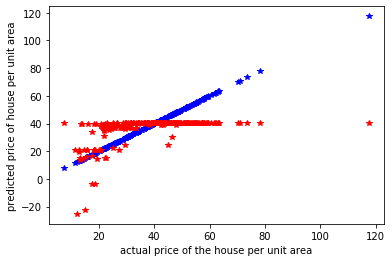

rmse on training set : 12.509064365286793
Accuracy on training set: 0.7860432614553287
rmse on test set : 11.077433080996643
Accuracy on test set: 0.7873779002271741


In [4]:
#training  and accuracy calculation using SVR
reg= SVR(kernel='poly',gamma="scale",degree=3,coef0=0)
reg.fit(X_train[2:,:].T,Y_train.T.ravel())        #excluding the first 2 columns
Y_p = reg.predict(X_train[2:,:].T)              
Y_p2 = reg.predict(X_dev[2:,:].T)
plt.plot(np.squeeze(Y_train),np.squeeze(Y_train),"b*") #the plot with 100% accuracy
plt.plot(np.squeeze(Y_train),np.squeeze(Y_p),'r*') 
plt.ylabel("predicted price of house per unit area")
plt.xlabel("actual price of the house per unit area")
plt.show()
print("rmse on training set :",np.mean((Y_p-Y_train)**2)**0.5)  
print("Accuracy on training set:",1-reg.score( X_train[2:,:].T,Y_train.T.ravel() )) 
print("rmse on test set :",np.mean((Y_p2-Y_dev)**2)**0.5) 
print("Accuracy on test set:" ,1-reg.score(X_dev[2:,:].T,Y_dev.T.ravel()))

In [5]:
#prediction on the test set
X_test = X_dev
index = 0
for i in range(1,len(fields)-1):
    print(fields[i],":",X_dev[i][index])
print("Predicted price of house per unit area:",Y_p2[index])
print("Actual price of house per unit area:",Y_dev[0][index])

X1 transaction date : 2013.0
X2 house age : 19.1
X3 distance to the nearest MRT station : 461.1016
X4 number of convenience stores : 5.0
X5 latitude : 24.95425
X6 longitude : 121.5399
Predicted price of house per unit area: 40.41611539373434
Actual price of house per unit area: 34.0
